# Data Scraping from OpenDataParis

## Import libraries

In [1]:
import requests
import json

import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams["figure.figsize"] = (16,6)
plotsize = (13, 5)

import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## API

In [2]:
# Set up the API endpoint and parameters
url = 'https://opendata.paris.fr/api/records/1.0/search/'
params = {
    'dataset': 'comptages-routiers-permanents',
#    'q': '',
    'facet': ['libelle', 't_1h', 'etat_trafic', 'libelle_nd_amont', 'libelle_nd_aval'],
    'refine.libelle': '4_Septembre',
    'refine.libelle_nd_amont': '4_Septembre-Richelieu',
    'rows': 10000
}

In [3]:
# Send a GET request to the API and store the response
response = requests.get(url, params=params)

In [4]:
# Print the status code of the response
print(f"Response status code: {response.status_code}")

Response status code: 200


In [5]:
# Extract the JSON data from the response
data = response.json()

In [6]:
# Print the number of records returned
print(f"Number of records returned: {len(data['records'])}")

Number of records returned: 9594


In [7]:
# Print the first record's fields
first_record = data['records'][0]['fields']
print(f"First record fields: {first_record}")

First record fields: {'k': 5.05056, 'q': 353.0, 'libelle': '4_Septembre', 'iu_ac': '1978', 'geo_point_2d': [48.86903471272503, 2.339319464229476], 'geo_shape': {'coordinates': [[2.3386088501, 48.8691745996], [2.3400300783, 48.8688948259]], 'type': 'LineString'}, 't_1h': '2022-01-01T22:00:00+00:00', 'date_fin': '2019-06-01', 'date_debut': '2005-01-01', 'iu_nd_amont': '2149', 'etat_trafic': 'Fluide', 'iu_nd_aval': '2150', 'libelle_nd_amont': '4_Septembre-Richelieu', 'etat_barre': 'Invalide', 'libelle_nd_aval': '4_Septembre-Bourse-Vivienne'}


In [8]:
response.json().keys()

dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])

In [9]:
# Create a list of dictionaries containing the fields for each record
records = [record['fields'] for record in data['records']]

## Resulting dataframe

In [10]:
# Convert the list of dictionaries into a Pandas DataFrame
df = pd.DataFrame.from_records(records)

In [11]:
df

,k,q,libelle,iu_ac,geo_point_2d,geo_shape,t_1h,date_fin,date_debut,iu_nd_amont,etat_trafic,iu_nd_aval,libelle_nd_amont,etat_barre,libelle_nd_aval
0,5.05056,353.0,4_Septembre,1978,"[48.86903471272503, 2.339319464229476]","{'coordinates': [[2.3386088501, 48.8691745996]...",2022-01-01T22:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
1,1.62111,126.0,4_Septembre,1978,"[48.86903471272503, 2.339319464229476]","{'coordinates': [[2.3386088501, 48.8691745996]...",2022-01-01T10:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
2,6.84111,474.0,4_Septembre,1978,"[48.86903471272503, 2.339319464229476]","{'coordinates': [[2.3386088501, 48.8691745996]...",2022-01-01T20:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
3,4.06722,294.0,4_Septembre,1978,"[48.86903471272503, 2.339319464229476]","{'coordinates': [[2.3386088501, 48.8691745996]...",2022-01-01T23:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
4,4.00500,288.0,4_Septembre,1978,"[48.86903471272503, 2.339319464229476]","{'coordinates': [[2.3386088501, 48.8691745996]...",2022-01-01T12:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9589,9.50056,756.0,4_Septembre,1978,"[48.869034711790604, 2.3393194642294763]","{'coordinates': [[2.3386088501499116, 48.86917...",2023-02-20T19:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
9590,10.28667,670.0,4_Septembre,1978,"[48.869034711790604, 2.3393194642294763]","{'coordinates': [[2.3386088501499116, 48.86917...",2023-02-20T15:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
9591,10.57222,680.0,4_Septembre,1978,"[48.869034711790604, 2.3393194642294763]","{'coordinates': [[2.3386088501499116, 48.86917...",2023-02-20T14:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne
9592,10.62000,661.0,4_Septembre,1978,"[48.869034711790604, 2.3393194642294763]","{'coordinates': [[2.3386088501499116, 48.86917...",2023-02-20T12:00:00+00:00,2019-06-01,2005-01-01,2149,Fluide,2150,4_Septembre-Richelieu,Invalide,4_Septembre-Bourse-Vivienne


## Dataset building

In [12]:
# Delete all columns except those 2
df = df.loc[:, ['t_1h','q']]

In [13]:
# Workplace attendance
df.rename({'q': 'WPAtt'}, axis=1, inplace=True)

In [14]:
#Add date column from another column extraction
df['Date'] = df['t_1h'].str[:10]

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [16]:
df.head()

,t_1h,WPAtt,Date
0,2022-01-01T22:00:00+00:00,353.0,2022-01-01
1,2022-01-01T10:00:00+00:00,126.0,2022-01-01
2,2022-01-01T20:00:00+00:00,474.0,2022-01-01
3,2022-01-01T23:00:00+00:00,294.0,2022-01-01
4,2022-01-01T12:00:00+00:00,288.0,2022-01-01


In [17]:
df['Hour'] = df['t_1h'].str[11:13]

In [18]:
df = df.iloc[: , 1:]

In [19]:
df.head()

,WPAtt,Date,Hour
0,353.0,2022-01-01,22
1,126.0,2022-01-01,10
2,474.0,2022-01-01,20
3,294.0,2022-01-01,23
4,288.0,2022-01-01,12


In [20]:
# List unique values for categorical columns
for col in df.select_dtypes('object'):
    print(f'{col:-<30} {df[col].unique()}')

Hour-------------------------- ['22' '10' '20' '23' '12' '06' '18' '05' '08' '04' '21' '19' '01' '03'
 '09' '13' '15' '17' '00' '02' '14' '11' '07' '16']


In [21]:
# Group analysis
df.groupby(['Hour']).mean()

,WPAtt
Hour,
00,334.005102
01,263.776081
02,188.977215
03,135.323232
04,120.032828
05,145.949495
06,225.770202
07,356.800505
08,496.185090


In [22]:
# Remove rows where hour is not equal to 09
df = df[df["Hour"] == "09"]

In [23]:
df.shape

(400, 3)

In [24]:
df = df.drop(columns=["Hour"])

In [25]:
df.head()

,WPAtt,Date
14,291.0,2022-01-15
70,697.0,2022-01-12
77,662.0,2022-01-13
100,621.0,2022-01-03
120,NaN,2022-01-06


In [26]:
# Sort DataFrame by date column
df.sort_values(by='Date', inplace = True)

In [27]:
pd.set_option('display.max_rows', None)

In [28]:
df

,WPAtt,Date
4832,90.0,2022-01-01
4907,150.0,2022-01-02
100,621.0,2022-01-03
4882,575.0,2022-01-04
4960,629.0,2022-01-05
120,NaN,2022-01-06
125,554.0,2022-01-07
4892,289.0,2022-01-08
4981,168.0,2022-01-09
4919,658.0,2022-01-10


In [29]:
# Fill in missing dates with 0
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date').asfreq('D').reset_index()

In [30]:
print(df.loc[df.index[94]])

Date     2022-04-05 00:00:00
WPAtt                  698.0
Name: 94, dtype: object


In [31]:
# Set date as index
df.set_index('Date', inplace=True)

In [32]:
df.head()

,WPAtt
Date,
2022-01-01,90.0
2022-01-02,150.0
2022-01-03,621.0
2022-01-04,575.0
2022-01-05,629.0


In [33]:
# Sort by date in index
df = df.sort_index()

In [34]:
# Fill with value from last 7 days 
df = df.fillna(df.shift(7))

In [35]:
# Fill with value from last 7 days 
df = df.fillna(df.shift(7))

<AxesSubplot:title={'center':'Worplace attendance over time'}, xlabel='Date'>

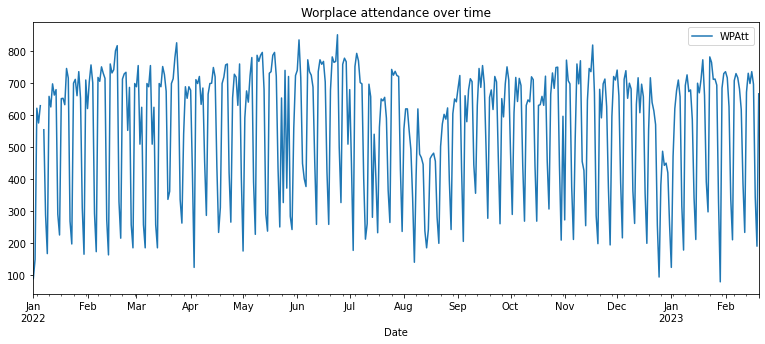

In [36]:
df.plot(figsize=plotsize, title='Worplace attendance over time')

In [37]:
df.to_csv('WorkplaceAttendance13MonthsScraping.csv', encoding='utf-8')